In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ic = pd.read_csv('IceCreamData.csv')
print(ic)

     Temperature     Revenue
0      24.566884  534.799028
1      26.005191  625.190122
2      27.790554  660.632289
3      20.595335  487.706960
4      11.503498  316.240194
..           ...         ...
495    22.274899  524.746364
496    32.893092  755.818399
497    12.588157  306.090719
498    22.362402  566.217304
499    28.957736  655.660388

[500 rows x 2 columns]


In [3]:
ic

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [4]:
ic.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [5]:
ic.info

<bound method DataFrame.info of      Temperature     Revenue
0      24.566884  534.799028
1      26.005191  625.190122
2      27.790554  660.632289
3      20.595335  487.706960
4      11.503498  316.240194
..           ...         ...
495    22.274899  524.746364
496    32.893092  755.818399
497    12.588157  306.090719
498    22.362402  566.217304
499    28.957736  655.660388

[500 rows x 2 columns]>

In [6]:
ic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


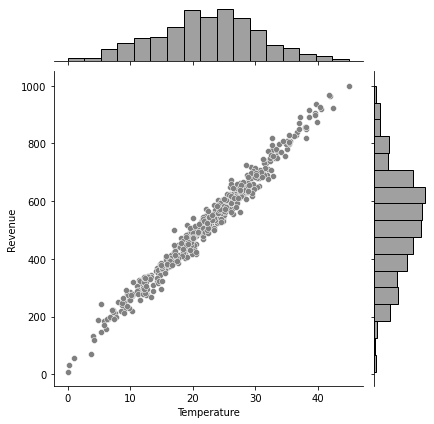

In [7]:
sns.jointplot(x = 'Temperature', y = 'Revenue', data = ic, color = 'gray')

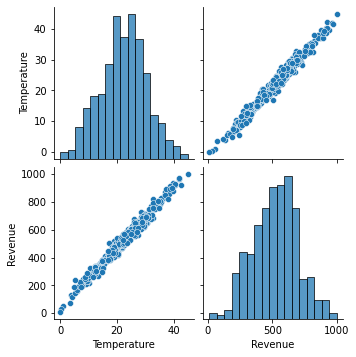

In [8]:
sns.pairplot(ic)

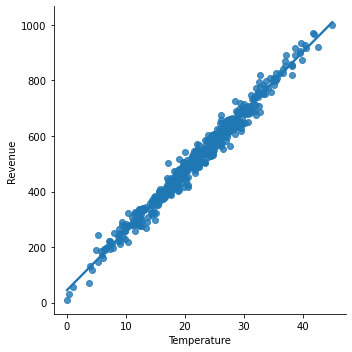

In [9]:
sns.lmplot(x = 'Temperature', y = 'Revenue', data = ic)

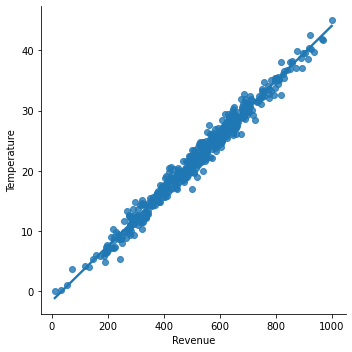

In [10]:
sns.lmplot(y = 'Temperature', x = 'Revenue', data = ic)

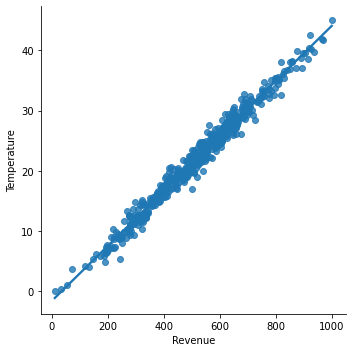

In [11]:
sns.lmplot(x = 'Revenue', y = 'Temperature', data = ic)

In [12]:
X = ic[['Temperature']]

In [13]:
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [14]:
Y = ic[['Revenue']]

In [15]:
Y

,Revenue
0,534.799028
1,625.190122
2,660.632289
3,487.706960
4,316.240194
...,...
495,524.746364
496,755.818399
497,306.090719
498,566.217304


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
y = ic[['Revenue']]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train

,Temperature
249,18.148952
433,8.756004
19,21.775948
322,18.439982
332,15.843022
...,...
106,23.761436
270,24.628611
348,38.185199
435,15.916678


In [20]:
y_test

,Revenue
361,659.873287
73,623.248701
374,559.135869
155,497.752318
104,627.901841
...,...
347,564.310532
86,643.944327
75,653.986736
438,412.082357


In [21]:
X_train.shape

(400, 1)

In [22]:
y_train.shape

(400, 1)

## Train model

In [35]:
from sklearn.linear_model import LinearRegression
regressor = (LinearRegression(fit_intercept = True))
regressor.fit(X_train,y_train)

LinearRegression()

In [36]:
print('linear model coefficient (m)', regressor.coef_)
print('linear model coefficient (b)', regressor.intercept_)

linear model coefficient (m) [[21.38197386]]
linear model coefficient (b) [46.80464128]


## Test model

In [37]:
y_predict = regressor.predict(X_test)

In [38]:
y_predict

array([[681.93870622],
       [632.14474995],
       [559.64360486],
       [498.90609993],
       [615.45939165],
       [304.72417213],
       [285.79420948],
       [315.60842003],
       [506.26427154],
       [685.69744019],
       [723.96030494],
       [400.84625166],
       [431.61634142],
       [671.36600031],
       [ 52.51422053],
       [198.77682819],
       [523.08595488],
       [563.90495549],
       [583.83579144],
       [682.24517768],
       [556.2285085 ],
       [783.88766163],
       [655.44109362],
       [570.0735459 ],
       [912.21841974],
       [664.74778505],
       [315.96428407],
       [631.00983241],
       [731.1169322 ],
       [698.02984963],
       [435.08453949],
       [471.22058847],
       [710.29440571],
       [799.81874771],
       [641.02153776],
       [493.66044553],
       [744.9247237 ],
       [318.10831232],
       [262.69083171],
       [132.04437543],
       [582.55738268],
       [230.41054193],
       [547.29799783],
       [393

Text(0.5, 1.0, 'training set')

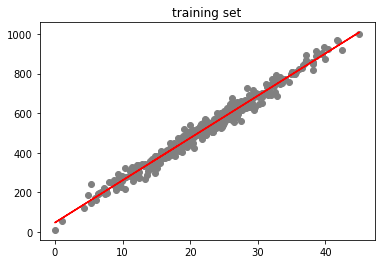

In [39]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('training set')

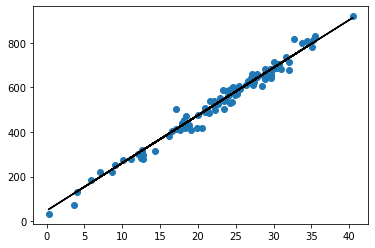

In [40]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predict, color = 'black')

In [50]:
T = [[40]]
rev = regressor.predict(T)

In [51]:
rev

array([[902.08359549]])